# Figure 2, Extended Data Fig. 4, Extended Data Figure 5, Extended Data Figure 6

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from uncertainties import ufloat
import uncertainties
from tqdm.auto import tqdm
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

## Extended Data Fig. 4 A-C
### ATP Yield per molecule of glucose

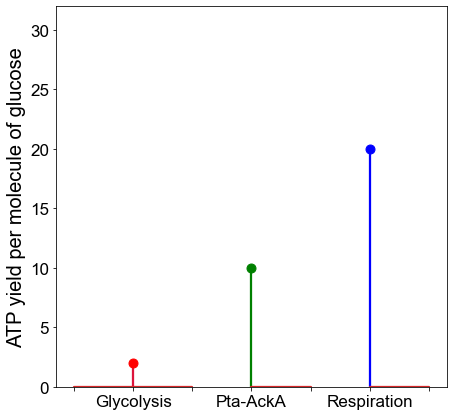

In [2]:
#Extended Data Fig. 4a
#ATP yield per molecule of glucose for E. coli

#ATP yield for ecoli 
Y_Glyc = 2
Y_Pta_acka = 10
Y_Resp = 20

#make three dataframes with fermentation and respiration yield values
d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
d2 = {'yield': [Y_Pta_acka, -1], 'pathway': ['Pta-AckA', ' ']}
d3 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', '    ']}
df = pd.DataFrame(data=d)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)

#generate figure
fig, ax = plt.subplots(figsize = (7,7))
sns.set_style("white", {"axes.edgecolor": "black"})
sns.set_context("talk")
plt.ylim(0,32)

plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
plt.stem(df2['pathway'], df2['yield'], 'green', markerfmt = "go")
plt.stem(df3['pathway'], df3['yield'], 'blue', markerfmt = "bo")

plt.ylabel('ATP yield per molecule of glucose',fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

plt.show()

#save figure
fig.savefig('./Figures/edf4a_ecoli_yield.svg',format='svg', dpi=1200)

In [3]:
def yieldPlot(Y_Glyc, Y_Resp):
    
    '''Takes the ATP yield per molecule values for fermentation and respiration and generates a stem plot'''
    
    #make two dataframes with fermentation and respiration yield values
    d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
    d2 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', ' ']}
    df = pd.DataFrame(data=d)
    df2 = pd.DataFrame(data=d2)

    #generate figure
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")
    plt.ylim(0,32)

    plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
    plt.stem(df2['pathway'], df2['yield'], 'darkblue', markerfmt = "bo")

    plt.ylabel('ATP yield per molecule of glucose',fontsize=20)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    return(fig)

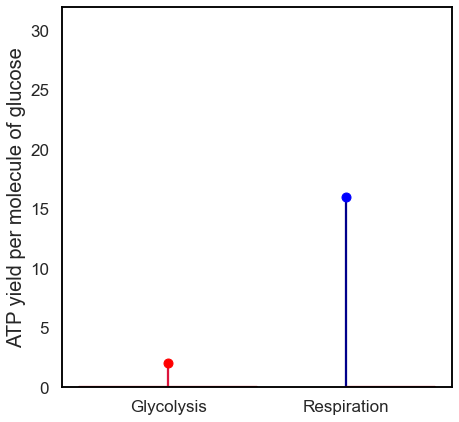

In [4]:
#Extended Data Fig. 4b
#ATP yield per molecule of glucose for S. cerevisiae
yeast_yield = yieldPlot(2, 16)

#save figure
yeast_yield.savefig('./Figures/edf4b_scerevisiae_yield.svg',format='svg', dpi=1200)

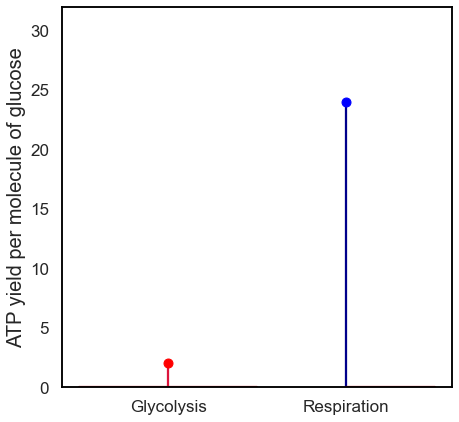

In [5]:
#Exended Data Fig. 4c
#ATP yield per molecule of glucose for mammalian cells 
mammalian_yield = yieldPlot(2, 24)

#save figure
mammalian_yield.savefig('./Figures/edf4c_mammalian_yield.svg',format='svg', dpi=1200)

## Extednded Data Fig. 4, D to F
### Proteome Occupany of Respiration, Glycolysis, and Total ATP-Producing Space

0.0564840640555226
0.08070300291611598
0.11203320246301975
0.1244051523108865


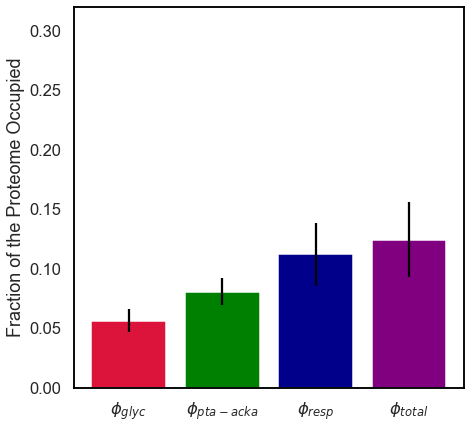

In [6]:
#Extended Data Fig. 4d
#Proteome Occupany of E. coli 

#parameter estimates for e. coli proteome occupany
total_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_atp_total.csv')
ferm_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_specific_activity_fermentation_no_ETC_occupancy.csv')
pta_acka_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_specific_activity_fermentation.csv')
resp_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_specific_activity_respiration.csv')

#calculate mean and std for fermentation and respiration 
ferm_mean = ferm_proteomics['value'].mean()
ferm_std = ferm_proteomics['value'].std()
pta_acka_mean = pta_acka_proteomics.loc[pta_acka_proteomics['estimate']=='fermentation', 'value'].mean()
pta_acka_std = pta_acka_proteomics.loc[pta_acka_proteomics['estimate']=='fermentation', 'value'].std()
resp_mean = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].mean()
resp_std = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].std()
total_mean = total_proteomics['value'].mean()
total_std = total_proteomics['value'].std()

#generate figure
fig, ax = plt.subplots(figsize = (7,7))
sns.set_style("white", {"axes.edgecolor": "black"})
sns.set_context("talk")

#create a dataset
frac = [ferm_mean, pta_acka_mean, resp_mean, total_mean]
frac_std = [ferm_std, pta_acka_std, resp_std, total_std]
label_list = ['$\phi_{glyc}$', '$\phi_{pta-acka}$', '$\phi_{resp}$', '$\phi_{total}$']
x_pos = np.arange(len(frac))
    
#create bars with different colors
ax.bar(x_pos, frac, color=['crimson', 'green', 'darkblue', 'purple'], yerr = frac_std)

#create names on the x-axis
plt.xticks(x_pos, label_list)
plt.ylim(0,0.32)

print(ferm_mean)
print(pta_acka_mean)
print(resp_mean)
print(total_mean)

#crate y-axis label
plt.ylabel('Fraction of the Proteome Occupied')

#save fig
fig.savefig('./Figures/edf4d_ecoli_proteome_fraction_occupied.svg',format='svg', dpi=1200)



In [7]:
def proteomeSpace(ferm_proteomics, resp_proteomics, total_proteomics):
    
    '''Takes proteome sum .csv for an organism and calculates mean and std for 
    respiration, fermentation, and total ATP-producing space. Returns a bar graph.'''
    
    #read proteome occupancy summary .csv
    #proteomics = pd.read_csv(csv)
    
    #calculate mean and std for fermentation and respiration 
    ferm_mean = ferm_proteomics.loc[ferm_proteomics['estimate']=='fermentation', 'value'].mean()
    ferm_std = ferm_proteomics.loc[ferm_proteomics['estimate']=='fermentation', 'value'].std()
    resp_mean = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].mean()
    resp_std = resp_proteomics.loc[resp_proteomics['estimate']=='respiration', 'value'].std()
    total_mean = total_proteomics['value'].mean()
    total_std = total_proteomics['value'].std()
    
    print(ferm_mean)
    print(resp_mean)
    print(total_mean)
    
    #generate figure 2D
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")

    #create a dataset
    frac = [ferm_mean, resp_mean, total_mean]
    frac_std = [ferm_std, resp_std, total_std]
    label_list = ['$\phi_{glyc}$', '$\phi_{resp}$', '$\phi_{total}$']
    x_pos = np.arange(len(frac))
    
    #create bars with different colors
    ax.bar(x_pos, frac, color=['crimson', 'darkblue', 'purple'], yerr = frac_std)

    #create names on the x-axis
    plt.xticks(x_pos, label_list)
    plt.ylim(0,0.32)

    #crate y-axis label
    plt.ylabel('Fraction of the Proteome Occupied')
    
    return(fig)

0.09128256610067087
0.11676296447919751
0.16757971719697087


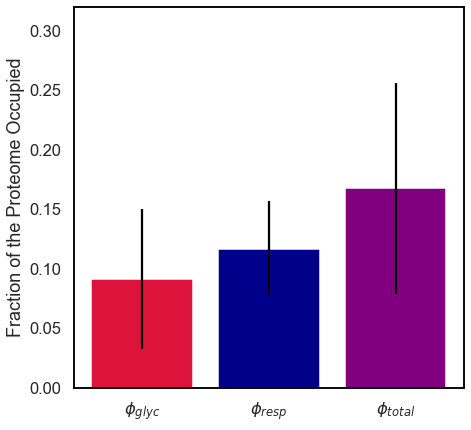

In [8]:
#Extended Data Fig. 4e
#Proteome Occupany of S. cerevisiae

#parameter estimates for proteome occupany
total_proteomics = pd.read_csv('./Data/2024_02_25_yeast_atp_total_core.csv')
resp_proteomics = pd.read_csv('./Data/2024_02_25_yeast_specific_activity_resp_core.csv')
ferm_proteomics = pd.read_csv('./Data/2024_02_25_yeast_specific_activity_fermentation.csv')

#S. cerevisiae Proteome Occupancy
fig = proteomeSpace(ferm_proteomics, resp_proteomics, total_proteomics)

#save fig
fig.savefig('./Figures/edf4e_scerevisiae_proteome_fraction_occupied.svg',format='svg', dpi=1200)

0.043132361598303776
0.04043458383462101
0.08356694543292485


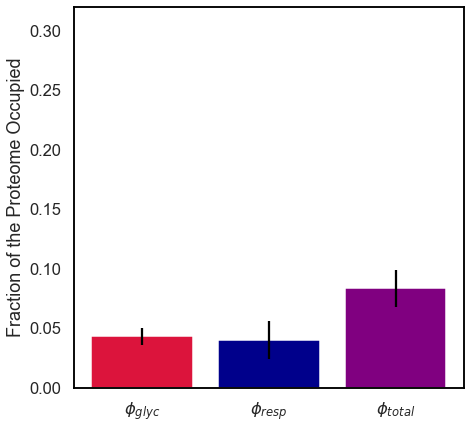

In [9]:
#Extended Data Fig. 4f
#Proteome Occupany of Mammalian Cells 

#parameter estimates for proteome occupany
total_proteomics = pd.read_csv('./Data/2024_02_26_mammalian_atp_total_core.csv')
resp_proteomics = pd.read_csv('./Data/2024_02_26_mammalian_specific_actvity_resp_core.csv')
ferm_proteomics = pd.read_csv('./Data/2024_02_26_mammalian_specific_actvity_ferm.csv')

#mammalian cell proteome occupany
fig = proteomeSpace(ferm_proteomics, resp_proteomics, total_proteomics)

#save fig
fig.savefig('./Figures/edf4f_mammalian_proteome_fraction_occupied.svg',format='svg', dpi=1200)

## Extended Data Fig. 4, J to O

In [10]:
#ATP production ratios for E. coli using molecular weight and stoich data for Extended Data Fig. 4

#Read in the E. coli inclusion list  
ecoli_inclusion = pd.read_csv('./Data/ecoli_inclusion.csv')
ecoli_inclusion = ecoli_inclusion[['EC number', 'pathway', 'Gene name', 'Accession', 'MW', 'meta_pathway']]

#Read in the molecular weight list for each EC number
ecoli_mw = pd.read_csv('./Data/ecoli_mw.csv')
ecoli_mw = ecoli_mw[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ecoli_inclusion = pd.merge(ecoli_inclusion, ecoli_mw, how = 'left', on = 'EC number')

#save as extended data table 
ecoli_inclusion.to_csv('./Data/ecoli_stoich_mass.csv')

#Fermentation Mass
ecoli_inclusion_ferm = ecoli_inclusion.loc[ecoli_inclusion['meta_pathway'] == 'fermentation']
ecoli_inclusion_ferm = ecoli_inclusion_ferm[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ferm_mass = ecoli_inclusion_ferm[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ferm_mass.drop_duplicates(inplace = True)
ferm_mass_pathway = ferm_mass.sum()[2]

#Respiration Mass
ecoli_inclusion_resp = ecoli_inclusion.loc[ecoli_inclusion['meta_pathway'] == 'respiration']
ecoli_inclusion_resp = ecoli_inclusion_resp[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ecoli_inclusion_resp.loc[ecoli_inclusion_resp['Gene name'] == 'ndh', 'pathway_stoich'] = 10 
ecoli_inclusion_resp['MW*Subunit_Stoich*Pathway_Stoich'] = ecoli_inclusion_resp['pathway_stoich'] * ecoli_inclusion_resp['MW*Subunit_Stoich']
resp_mass = ecoli_inclusion_resp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
resp_mass.drop_duplicates(inplace = True)
resp_mass_pathway = resp_mass.sum()[2]

#Glycolysis Mass
ecoli_inclusion_glycolysis = ecoli_inclusion.loc[ecoli_inclusion['pathway'] == 'glycolysis']
ecoli_inclusion_glycolysis = ecoli_inclusion_glycolysis[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
glycolysis_mass = ecoli_inclusion_glycolysis[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
glycolysis_mass.drop_duplicates(inplace = True)
glycolysis_mass_pathway = glycolysis_mass.sum()[2]

#ETC Mass
ecoli_inclusion_etc = ecoli_inclusion.loc[ecoli_inclusion['pathway'] == 'etc']
ecoli_inclusion_etc = ecoli_inclusion_etc[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ecoli_inclusion_etc.loc[(ecoli_inclusion_etc['EC number'] == '7.1.1.2') | (ecoli_inclusion_etc['Gene name'] == 'ndh'), 'pathway_stoich'] = 4
ecoli_inclusion_etc.loc[(ecoli_inclusion_etc['EC number'] == '7.1.1.3') | (ecoli_inclusion_etc['EC number'] == '7.1.1.7.1')| (ecoli_inclusion_etc['EC number'] == '7.1.1.7.2'), 'pathway_stoich'] = 2
ecoli_inclusion_etc['MW*Subunit_Stoich*Pathway_Stoich'] = ecoli_inclusion_etc['pathway_stoich'] * ecoli_inclusion_etc['MW*Subunit_Stoich']
etc_mass = ecoli_inclusion_etc[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
etc_mass.drop_duplicates(inplace = True)
etc_mass_pathway = etc_mass.sum()[2]

#ATP Mass
ecoli_inclusion_atp = ecoli_inclusion.loc[ecoli_inclusion['pathway'] == 'atp']
ecoli_inclusion_atp = ecoli_inclusion_atp[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ecoli_inclusion_atp['pathway_stoich'] = 3.2
ecoli_inclusion_atp['MW*Subunit_Stoich*Pathway_Stoich'] = ecoli_inclusion_atp['pathway_stoich'] * ecoli_inclusion_atp['MW*Subunit_Stoich']
atp_mass = ecoli_inclusion_atp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
atp_mass.drop_duplicates(inplace = True)
atp_mass_pathway = atp_mass.sum()[2]

#Calculating the total mass of each pathway
fermentation_mass_pathway_total = ferm_mass_pathway
pta_acka_mass_pathway_total = ferm_mass_pathway + etc_mass_pathway + atp_mass_pathway
resp_mass_pathway_total = resp_mass_pathway + glycolysis_mass_pathway

1.669701
6.4147718
15.755932866666667


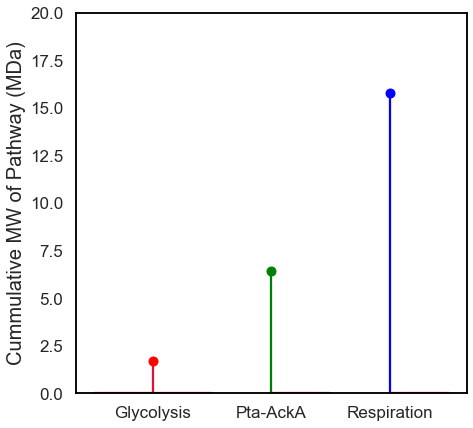

In [11]:
#Extended Data Fig. 4j
#Cumulative molecular weight of pathway for E. coli

#ATP yield for ecoli 
Y_Glyc = fermentation_mass_pathway_total / 1e6
Y_Pta_acka = pta_acka_mass_pathway_total / 1e6
Y_Resp = resp_mass_pathway_total / 1e6

#make three dataframes with fermentation and respiration yield values
d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
d2 = {'yield': [Y_Pta_acka, -1], 'pathway': ['Pta-AckA', ' ']}
d3 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', '    ']}
df = pd.DataFrame(data=d)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)

#generate figure
fig, ax = plt.subplots(figsize = (7,7))
sns.set_style("white", {"axes.edgecolor": "black"})
sns.set_context("talk")
plt.ylim(0,20)

plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
plt.stem(df2['pathway'], df2['yield'], 'green', markerfmt = "go")
plt.stem(df3['pathway'], df3['yield'], 'blue', markerfmt = "bo")

plt.ylabel('Cummulative MW of Pathway (MDa)',fontsize=20)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

print(Y_Glyc)
print(Y_Pta_acka)
print(Y_Resp)


plt.show()

#save figure
fig.savefig('./Figures/edf4j_ecoli_MW_pathway.svg',format='svg', dpi=1200)

1.197819250272953
1.5589019082487081
1.269363113517201


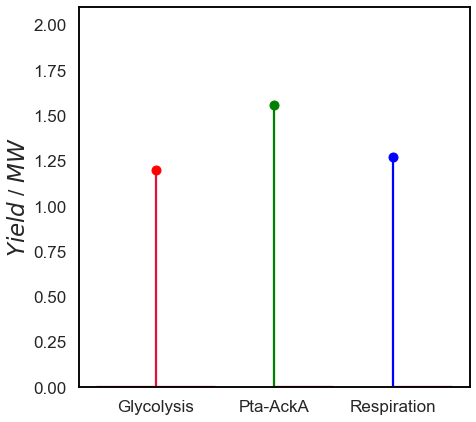

In [12]:
#Exended Data Fig. 4m
#ATP yield / molecular weight of pathway for E. coli

#ATP yield for ecoli 
y_fermentation = 2
y_pta_acka = 10
y_resp = 20

#ATP yield for ecoli 
Y_Glyc = y_fermentation / (fermentation_mass_pathway_total / 1e6)
Y_Pta_acka =  y_pta_acka / (pta_acka_mass_pathway_total / 1e6)
Y_Resp =  y_resp / (resp_mass_pathway_total / 1e6)

#make three dataframes with fermentation and respiration yield values
d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
d2 = {'yield': [Y_Pta_acka, -1], 'pathway': ['Pta-AckA', ' ']}
d3 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', '    ']}
df = pd.DataFrame(data=d)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)

#generate figure
fig, ax = plt.subplots(figsize = (7,7))
sns.set_style("white", {"axes.edgecolor": "black"})
sns.set_context("talk")
plt.ylim(0,2.1)

plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
plt.stem(df2['pathway'], df2['yield'], 'green', markerfmt = "go")
plt.stem(df3['pathway'], df3['yield'], 'blue', markerfmt = "bo")

plt.ylabel(r'$ Yield$ / $MW$', fontsize=23)
plt.yticks(fontsize=17)
plt.xticks(fontsize=17)

print(Y_Glyc)
print(Y_Pta_acka)
print(Y_Resp)

plt.show()

#save figure
fig.savefig('./Figures/edf4m_ecoli_ratio.svg',format='svg', dpi=1200)

In [13]:
#ATP production ratios for S. cerevisiae using molecular weight and stoich data for Extended Data Fig. 4

#read in the S. cerevisiae inclusion list  
yeast_inclusion = pd.read_csv('./Data/yeast_inclusion.csv')
#Read in the molecular weight list for each EC number
yeast_mw = pd.read_csv('./Data/yeast_mw.csv')
yeast_mw = yeast_mw[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
yeast_inclusion = pd.merge(yeast_inclusion, yeast_mw, how = 'left', on = 'EC number')
yeast_inclusion.drop(columns = {'Unnamed: 0'}, inplace = True)
yeast_inclusion.drop_duplicates(inplace = True)

#Extended Data Table
yeast_inclusion.to_csv('./Data/yeast_stoich_mass.csv')

yeast_inclusion_ferm = yeast_inclusion.loc[yeast_inclusion['meta_pathway'] == 'fermentation']
yeast_inclusion_ferm = yeast_inclusion_ferm[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
ferm_mass = yeast_inclusion_ferm[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ferm_mass.drop_duplicates(inplace = True)
ferm_mass_pathway = ferm_mass.sum()[2]

yeast_inclusion_resp = yeast_inclusion.loc[yeast_inclusion['meta_pathway'] == 'respiration']
yeast_inclusion_resp = yeast_inclusion_resp[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
resp_mass = yeast_inclusion_resp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
resp_mass.drop_duplicates(inplace = True)
resp_mass_pathway = resp_mass.sum()[2]

yeast_inclusion_glycolysis = yeast_inclusion.loc[yeast_inclusion['pathway'] == 'glycolysis']
yeast_inclusion_glycolysis = yeast_inclusion_glycolysis[['EC number', 'pathway', 'Gene name', 'meta_pathway', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']].drop_duplicates()
glycolysis_mass = yeast_inclusion_glycolysis[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
glycolysis_mass.drop_duplicates(inplace = True)
glycolysis_mass_pathway = glycolysis_mass.sum()[2]

In [14]:
#Pathway Yields
Y_ferm = 2
Y_resp = 16

#Mass * Pathway Stoichometry for Fermentation / Respiration in S. cereivisae
mass_pathway = (1/ferm_mass_pathway * Y_ferm) / ((1/ (resp_mass_pathway + glycolysis_mass_pathway)) * Y_resp)

1.0777580247619045
20.77689273476191


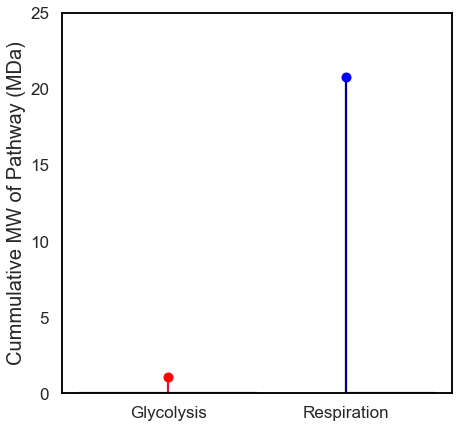

In [15]:
#Extended Data Fig. 4k
#Cumulative molecular weight of pathway for S. cerevisiae
def yieldPlot(Y_Glyc, Y_Resp):
    
    '''Takes the ATP yield per molecule values for fermentation and respiration and generates a stem plot'''
    
    #make two dataframes with fermentation and respiration yield values
    d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
    d2 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', ' ']}
    df = pd.DataFrame(data=d)
    df2 = pd.DataFrame(data=d2)

    #generate figure
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")
    plt.ylim(0,25)

    plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
    plt.stem(df2['pathway'], df2['yield'], 'darkblue', markerfmt = "bo")

    plt.ylabel('Cummulative MW of Pathway (MDa)',fontsize=20)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    return(fig)

#Exended Data Fig. 4b
#ATP yield per molecule of glucose for S. cerevisiae
print(ferm_mass_pathway / 1e6)
print((resp_mass_pathway + glycolysis_mass_pathway) / 1e6)
yeast_yield = yieldPlot(ferm_mass_pathway / 1e6, (resp_mass_pathway + glycolysis_mass_pathway)/ 1e6)


#save figure
yeast_yield.savefig('./Figures/edf4k_scerevisiae_MW.svg',format='svg', dpi=1200)

1.8557041135850831
0.7700862782638489


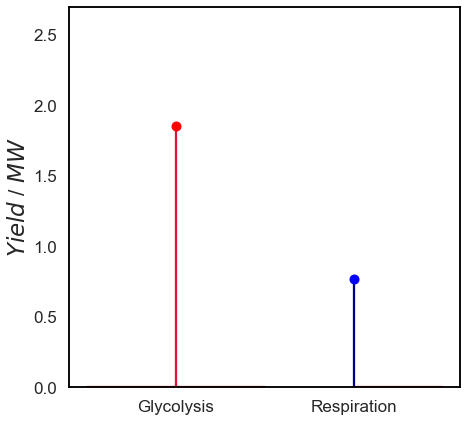

In [16]:
#Extended Data Fig. 4n
#ATP yield / molecular weight of pathway for S. cerevisiae

ferm_ratio = Y_ferm / (ferm_mass_pathway / 1e6)
resp_ratio = Y_resp / ((resp_mass_pathway + glycolysis_mass_pathway) / 1e6)

def yieldPlot(Y_Glyc, Y_Resp):
    
    '''Takes the ATP yield per molecule values for fermentation and respiration and generates a stem plot'''
    
    #make two dataframes with fermentation and respiration yield values
    d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
    d2 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', ' ']}
    df = pd.DataFrame(data=d)
    df2 = pd.DataFrame(data=d2)

    #generate figure
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")
    plt.ylim(0,2.7)

    plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
    plt.stem(df2['pathway'], df2['yield'], 'darkblue', markerfmt = "bo")

    
    plt.ylabel(r'$ Yield$ / $MW$', fontsize=23)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    return(fig)

#Exended Data Fig. 4b
#ATP yield per molecule of glucose for S. cerevisiae
print(ferm_ratio)
print(resp_ratio)

yeast_yield = yieldPlot(ferm_ratio, resp_ratio)


#save figure
yeast_yield.savefig('./Figures/edf4n_scerevisiae_ratio.svg',format='svg', dpi=1200)


In [17]:
#ATP production ratios for mammalian cells using molecular weight and stoich data for Extended Data Fig. 4

#Read in the mammalian inclusion list  
mammalian_inclusion = pd.read_csv('./Data/mammalian_inclusion.csv')
mammalian_inclusion = mammalian_inclusion[['EC number', 'pathway', 'Gene name', 'MW', 'meta_pathway']]

#Read in the molecular weight list for each EC number
mammalian_mw = pd.read_csv('./Data/mammalian_mw.csv')
mammalian_mw = mammalian_mw[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
mammalian_inclusion = pd.merge(mammalian_inclusion, mammalian_mw, how = 'left', on = 'EC number')

#Extended Data Table
mammalian_inclusion.to_csv('./Data/mammalian_mass_stoich.csv')

mammalian_inclusion_ferm = mammalian_inclusion.loc[mammalian_inclusion['meta_pathway'] == 'fermentation']
ferm_mass = mammalian_inclusion_ferm[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
ferm_mass.drop_duplicates(inplace = True)
ferm_mass_pathway = ferm_mass.sum()[2]

mammalian_inclusion_resp = mammalian_inclusion.loc[mammalian_inclusion['meta_pathway'] == 'respiration']
resp_mass = mammalian_inclusion_resp[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
resp_mass.drop_duplicates(inplace = True)
resp_mass_pathway = resp_mass.sum()[2]

mammalian_inclusion_glycolysis = mammalian_inclusion.loc[mammalian_inclusion['pathway'] == 'glycolysis']
glycolysis_mass = mammalian_inclusion_glycolysis[['EC number', 'MW*Subunit_Stoich', 'MW*Subunit_Stoich*Pathway_Stoich', 'pathway_stoich']]
glycolysis_mass.drop_duplicates(inplace = True)
glycolysis_mass_pathway = glycolysis_mass.sum()[2]


1.067968
29.424359833333337


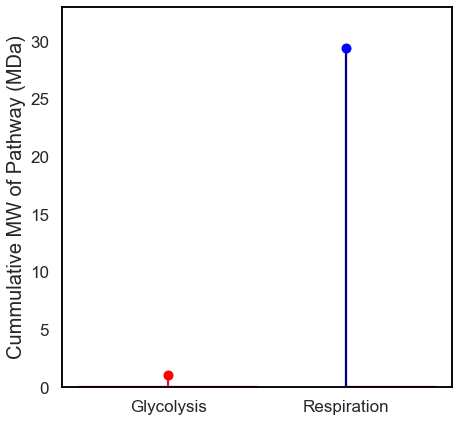

In [18]:
#Extended Data Fig. 4l
#Cumulative molecular weight of pathway for mammalian cells

def yieldPlot(Y_Glyc, Y_Resp):
    
    '''Takes the ATP yield per molecule values for fermentation and respiration and generates a stem plot'''
    
    #make two dataframes with fermentation and respiration yield values
    d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
    d2 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', ' ']}
    df = pd.DataFrame(data=d)
    df2 = pd.DataFrame(data=d2)

    #generate figure
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")
    plt.ylim(0,33)

    plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
    plt.stem(df2['pathway'], df2['yield'], 'darkblue', markerfmt = "bo")

    plt.ylabel('Cummulative MW of Pathway (MDa)',fontsize=20)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    return(fig)

#Exended Data Fig. 4b
#ATP yield per molecule of glucose for S. cerevisiae
print(ferm_mass_pathway / 1e6)
print((resp_mass_pathway + glycolysis_mass_pathway)/ 1e6)
yeast_yield = yieldPlot(ferm_mass_pathway / 1e6, (resp_mass_pathway + glycolysis_mass_pathway) / 1e6)


#save figure
yeast_yield.savefig('./Figures/sf4l_mammalian_mw.svg',format='svg', dpi=1200)

1.8727152873494337
0.8156507103618152


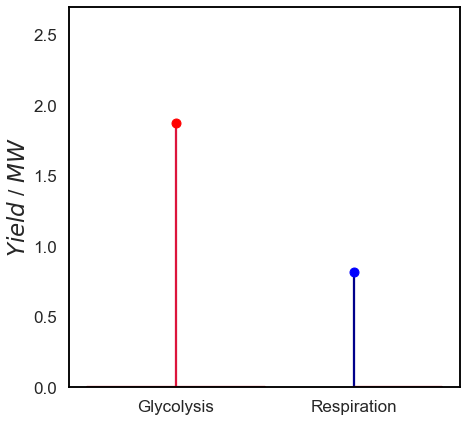

In [19]:
#Extended Data Fig. 4o
#ATP yield / molecular weight of pathway for mammalian cells

Y_ferm = 2
Y_resp = 24

ferm_ratio =  Y_ferm / (ferm_mass_pathway / 1e6)
resp_ratio =  Y_resp / ((resp_mass_pathway + glycolysis_mass_pathway) /  1e6)
def yieldPlot(Y_Glyc, Y_Resp):
    
    '''Takes the ATP yield per molecule values for fermentation and respiration and generates a stem plot'''
    
    #make two dataframes with fermentation and respiration yield values
    d = {'yield': [-1, Y_Glyc, -1], 'pathway': ['', 'Glycolysis', '   ']}
    d2 = {'yield': [Y_Resp, -1], 'pathway': ['Respiration', ' ']}
    df = pd.DataFrame(data=d)
    df2 = pd.DataFrame(data=d2)

    #generate figure
    fig, ax = plt.subplots(figsize = (7,7))
    sns.set_style("white", {"axes.edgecolor": "black"})
    sns.set_context("talk")
    plt.ylim(0,2.7)

    plt.stem(df['pathway'], df['yield'], 'crimson', markerfmt = "ro")
    plt.stem(df2['pathway'], df2['yield'], 'darkblue', markerfmt = "bo")

    
    plt.ylabel(r'$ Yield$ / $MW$', fontsize=23)
    plt.yticks(fontsize=17)
    plt.xticks(fontsize=17)
    
    
    return(fig)

#Exended Data Fig. 4b
#ATP yield per molecule of glucose for S. cerevisiae
print(ferm_ratio)
print(resp_ratio)
yeast_yield = yieldPlot(ferm_ratio, resp_ratio)


#save figure
yeast_yield.savefig('./Figures/sf4o_mammalian_ratio.svg',format='svg', dpi=1200)

## Fig. 2 A to C, Supplemental Fig. 4, G to I, Supplemental Fig. 6
### Glucose consumption and ATP production rate (umol mgprotein-1 min-1)

In [20]:
def warburgRates(rates, anaerobic_proteomics, ferm_proteomics, resp_proteomics, gly_proteomics, Y_Anaerobic, Y_Ferm, Y_Resp): 
    
    '''For E. coli, performs bootstrapping to resample the five parameter estimates (i.e. fraction of 
    the proteome occupied by pathway, specific activity, and ATP yield) with replacement (N=10,000). 
    After each round of sampling, the specific activity of each pathway is calculated. The sampled 
    parameter values for proteome occupied by pathway, specific activity, and ATP yield from each 
    round of bootstrapping are used in the linear program described in the function above. 
    All 10,000 results are stored in a data frame, which in the output.'''

    results_final = []
    
    for j in tqdm(range(10000)):
    
        #random choice with replacement for each paramter 
        sample_activity_respiration = rates.loc[rates['pathway'] == 'Respiration', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique() / 60
        #print(sample_activity_respiration)
        sample_activity_fermentation = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique() / 60
        #print(sample_activity_fermentation)
        sample_activity_anaerobic = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique() / 60
        #print(sample_activity_anaerobic)
        sample_mass_respiraition = resp_proteomics.loc[(resp_proteomics['estimate'] == 'respiration'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_fermentation = ferm_proteomics.loc[(ferm_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_anaerobic = anaerobic_proteomics.loc[(anaerobic_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_anaerobic)
        sample_mass_glycolysis = gly_proteomics.loc[(gly_proteomics['estimate'] == 'fermentation'), 'value'].unique()
           
        sample_size_activity_respiration = len(sample_activity_respiration)
        sample_size_activity_fermentation = len(sample_activity_fermentation)
        sample_size_activity_anaerobic = len(sample_activity_anaerobic)
        sample_size_mass_respiraition = len(sample_mass_respiraition)
        sample_size_mass_fermentation = len(sample_mass_fermentation)
        sample_size_mass_anaerobic = len(sample_mass_anaerobic)
        sample_size_mass_glycolysis= len(sample_mass_glycolysis)
    
        sample_specific_activity_fermentation = np.random.choice(sample_activity_fermentation, size=sample_size_activity_fermentation,replace=True)
        sample_specific_activity_respiration = np.random.choice(sample_activity_respiration, size=sample_size_activity_respiration, replace=True)
        sample_specific_activity_anaerobic = np.random.choice(sample_activity_anaerobic, size=sample_size_activity_anaerobic, replace=True)
        
        sample_fraction_fermentation = np.random.choice(sample_mass_fermentation, size=sample_size_mass_fermentation, replace=True)
        sample_fraction_respiration = np.random.choice(sample_mass_respiraition, size=sample_size_mass_respiraition, replace=True)
        sample_fraction_anaerobic = np.random.choice(sample_mass_anaerobic, size=sample_size_mass_anaerobic, replace=True)
        sample_fraction_glycolysis = np.random.choice(sample_mass_glycolysis, size=sample_size_mass_glycolysis, replace=True)
        
        V_Ferm =  sample_specific_activity_fermentation.mean() / sample_fraction_fermentation.mean() 
        V_Resp =  sample_specific_activity_respiration.mean() / sample_fraction_respiration.mean() 
        V_Anaerobic = sample_specific_activity_anaerobic.mean() / sample_fraction_anaerobic.mean() 
        V_Correction = sample_specific_activity_fermentation.mean() / sample_fraction_glycolysis.mean()
        #print(sample_fraction_anaerobic.mean())
    
        rate_ratio = V_Resp / V_Anaerobic
        
        V_Resp =  sample_specific_activity_respiration.mean() / (sample_fraction_respiration.mean() + sample_fraction_glycolysis.mean() * rate_ratio)

        #ATP yield
        Y_Ferm = Y_Ferm
        Y_Resp = Y_Resp
        Y_Anaerobic = Y_Anaerobic
        
        #ATP Production Rate 
        V_Ferm_ATP = V_Ferm * Y_Ferm
        V_Resp_ATP = V_Resp * Y_Resp
        V_Anaerobic_ATP = V_Anaerobic * Y_Anaerobic
        #print(V_Anaerobic_ATP)
        
        results = [V_Anaerobic, V_Ferm, V_Resp, V_Anaerobic_ATP, V_Ferm_ATP, V_Resp_ATP]
        
        #Append the outputs for each bootstrap iteration
        results_final.append(results)
    
    #print(len(results_final))
    #Convert the array into a dataframe
    df = pd.DataFrame({'V_Anaerobic' : [], 'V_Ferm' : [], 'V_Resp' : [], 'V_Anaerobic_ATP' : [], 'V_Ferm_ATP' : [], 'V_Resp_ATP' : []})

    for i in range(len(results_final)):
        df_temp_vanaerobic = pd.DataFrame({'V_Anaerobic' : [results_final[i][0]]})
        df_temp_vferm = pd.DataFrame({'V_Ferm' : [results_final[i][1]]})
        df_temp_vresp = pd.DataFrame({'V_Resp' : [results_final[i][2]]})
        df_temp_vanaerobicatp = pd.DataFrame({'V_Anaerobic_ATP' : [results_final[i][3]]})
        df_temp_vfermatp = pd.DataFrame({'V_Ferm_ATP' : [results_final[i][4]]})
        df_temp_vrespatp = pd.DataFrame({'V_Resp_ATP' : [results_final[i][5]]})
        out = df_temp_vanaerobic.join([df_temp_vferm, df_temp_vresp, df_temp_vanaerobicatp, df_temp_vfermatp, df_temp_vrespatp])
        
        df = pd.concat([df, out])
        
    return(df)

In [21]:
def activityPlot(data, graph_type):
    
    'For E. coli, plots the results of the warburgRate function'

    data2 = data.melt()
    data2['label'] = 'none'
    data2.loc[data2['variable'].str.contains('Ferm'), 'label'] = 'Fermentation'
    data2.loc[data2['variable'].str.contains('Resp'), 'label'] = 'Respiration'
    

    if graph_type == 'glucose': 
    
        data2 = data2.loc[~(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ana')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())
        

        fig, ax = plt.subplots(figsize=(8,8))

        # plot a bar chart
        colors = ["crimson", "green", 'darkblue']
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci=95, capsize=0, zorder=2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = warburgCI(data)
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
        #print(yerr2)

        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 7)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("Glucose consumption rate" r'$ \left(\frac{\mu mol}{mg_{pathway} \cdot min^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.3')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((.2/60,700/60))

    if graph_type == 'ATP': 

        data2 = data2.loc[(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ana')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())
        
        fig, ax = plt.subplots(figsize=(8,8))
    
        # plot a bar chart
        colors = ["crimson", "green", 'darkblue']
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci="sd", capsize=0.2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = warburgCI(data)
        
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
        
        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 5)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("ATP Production Rate" r'$ \left(\frac{\mu mol}{mg_{pathway} \cdot min^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        #ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.2')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((0,yerr['conf95_high'][4] * 1.15))

    return(fig)
    

In [22]:
def warburgCI(df): 
    
    '''For E. coli, calculates the 95 confidence interval for each output of the model'''

    df_sub = df[['V_Anaerobic', 'V_Ferm', 'V_Resp', 'V_Anaerobic_ATP', 'V_Ferm_ATP', 'V_Resp_ATP']]
    
    conf95_high = []
    conf95_low = []

    for column in list(df_sub.columns): 
        df_temp = df_sub[[column]]
        sample = np.array(df_temp[column])
        #mean, sigma = np.mean(sample), np.std(sample)
        #conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
        #confidence95 = mean - conf_int[0]
        sample_count = len(sample)
        sample_high = sample_count * .975
        sample_low = sample_count * .025
        sample = np.sort(sample)
        #print(type(sample[int(sample_high) - 1]))
        conf95_high = np.append(conf95_high, sample[int(sample_high) - 1])
        conf95_low = np.append(conf95_low, sample[int(sample_low) - 1])
        
    df = pd.DataFrame({'conf95_low': conf95_low, 'conf95_high': conf95_high}, 
                      index = ['V_Anaerobic', 'V_Ferm', 'V_Resp', 'V_Anaerobic_ATP', 'V_Ferm_ATP', 'V_Resp_ATP'])
    #print(df)
    return(df)  

In [23]:
#Specific acitivity estimate inputs for E. coli

#parameters estimates for specfic activity
rates = pd.read_csv('./Data/ecoli_cellular_rates.csv')

#parameters estimates for specfic activity proteome
total_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_atp_total.csv')
ferm_anaerobic_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_specific_activity_fermentation_no_ETC_occupancy.csv')
ferm_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_specific_activity_fermentation.csv')
resp_proteomics = pd.read_csv('./Data/2024_02_22_ecoli_specific_activity_respiration.csv')

#Calculating specific activities
ecoli_anaerobic = warburgRates(rates, ferm_anaerobic_proteomics, ferm_proteomics, resp_proteomics, ferm_proteomics, 2, 10, 20)


  0%|          | 0/10000 [00:00<?, ?it/s]

4.213013142537706
2.947269128091007
0.7440057017325268


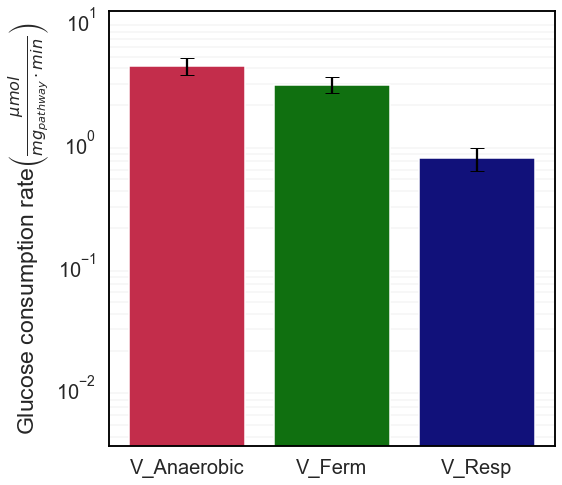

In [24]:
#Extended Data Fig. 4g
#Glucose consumption specific activities for E. coli 
fig = activityPlot(ecoli_anaerobic, 'glucose')

fig.savefig('./Figures/edf4g_ecoli_glucose_specific_activity.svg',format='svg', dpi=1200)

8.426026285075412
29.472691280909878
14.880114034650639


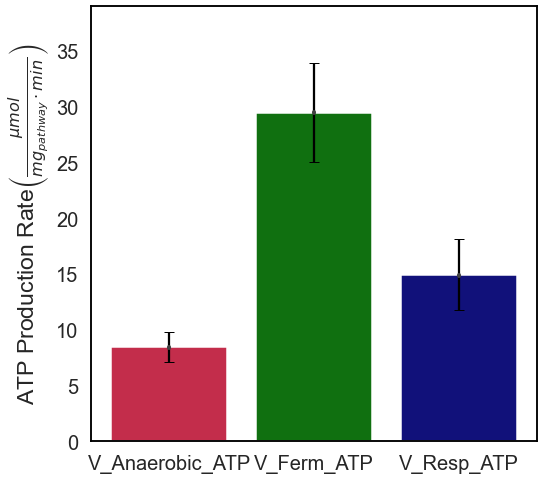

In [25]:
#Fig. 2a
#ATP production specific activities for E. coli 
fig = activityPlot(ecoli_anaerobic, 'ATP')

fig.savefig('./Figures/fig2a_ecoli_atp_specific_activity.svg',format='svg', dpi=1200)

In [26]:
def warburgRates(rates, ferm_proteomics, resp_proteomics, gly_proteomics, Y_Ferm, Y_Resp): 
    
    '''For yeast and mammlian cells, performs bootstrapping to resample the five parameter estimates (i.e. fraction of 
    the proteome occupied by pathway, specific activity, and ATP yield) with replacement (N=10,000). 
    After each round of sampling, the specific activity of each pathway is calculated. The sampled 
    parameter values for proteome occupied by pathway, specific activity, and ATP yield from each 
    round of bootstrapping are used in the linear program described in the function above. 
    All 10,000 results are stored in a data frame, which is the output.'''

    results_final = []
    
    for j in tqdm(range(10000)):
    
        #random choice with replacement for each paramter 
        sample_activity_respiration = rates.loc[rates['pathway'] == 'Respiration', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique() / 60
        #print(sample_activity_respiration)
        sample_activity_fermentation = rates.loc[rates['pathway'] == 'Fermentation', 'glucose uptake rate  (mmol gprotein-1 hr-1)'].unique() / 60
        #print(sample_activity_fermentation)
        sample_mass_respiraition = resp_proteomics.loc[(resp_proteomics['estimate'] == 'respiration'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_fermentation = ferm_proteomics.loc[(ferm_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        #print(sample_mass_respiraition)
        sample_mass_glycolysis = gly_proteomics.loc[(gly_proteomics['estimate'] == 'fermentation'), 'value'].unique()
        
        sample_size_activity_respiration = len(sample_activity_respiration)
        sample_size_activity_fermentation = len(sample_activity_fermentation)
        sample_size_mass_respiraition = len(sample_mass_respiraition)
        sample_size_mass_fermentation = len(sample_mass_fermentation)
        sample_size_mass_glycolysis= len(sample_mass_glycolysis)
    
        sample_specific_activity_fermentation = np.random.choice(sample_activity_fermentation, size=sample_size_activity_fermentation,replace=True)
        sample_specific_activity_respiration = np.random.choice(sample_activity_respiration, size=sample_size_activity_respiration, replace=True)
        sample_fraction_fermentation = np.random.choice(sample_mass_fermentation, size=sample_size_mass_fermentation, replace=True)
        sample_fraction_respiration = np.random.choice(sample_mass_respiraition, size=sample_size_mass_respiraition, replace=True)
        sample_fraction_glycolysis = np.random.choice(sample_mass_glycolysis, size=sample_size_mass_glycolysis, replace=True)
        
        V_Ferm =  sample_specific_activity_fermentation.mean() / sample_fraction_fermentation.mean() 
        V_Resp =  sample_specific_activity_respiration.mean() / sample_fraction_respiration.mean() 
    
        rate_ratio = V_Resp / V_Ferm
        
        V_Resp =  sample_specific_activity_respiration.mean() / (sample_fraction_respiration.mean() + sample_fraction_glycolysis.mean() * rate_ratio)

        #ATP yield
        Y_Ferm = Y_Ferm
        Y_Resp = Y_Resp
        
        #ATP Production Rate 
        V_Ferm_ATP = V_Ferm * Y_Ferm
        V_Resp_ATP = V_Resp * Y_Resp
        
        results = [V_Ferm, V_Resp, V_Ferm_ATP, V_Resp_ATP]
        
        #Append the outputs for each bootstrap iteration
        results_final.append(results)
    
    #print(len(results_final))
    #Convert the array into a dataframe
    df = pd.DataFrame({'V_Ferm' : [], 'V_Resp' : [], 'V_Ferm_ATP' : [], 'V_Resp_ATP' : []})

    for i in range(len(results_final)):
        df_temp_vferm = pd.DataFrame({'V_Ferm' : [results_final[i][0]]})
        df_temp_vresp = pd.DataFrame({'V_Resp' : [results_final[i][1]]})
        df_temp_vfermatp = pd.DataFrame({'V_Ferm_ATP' : [results_final[i][2]]})
        df_temp_vrespatp = pd.DataFrame({'V_Resp_ATP' : [results_final[i][3]]})
        out = df_temp_vferm.join([df_temp_vresp, df_temp_vfermatp, df_temp_vrespatp])
        
        df = pd.concat([df, out])
        
    return(df)

In [27]:
def warburgCI(df): 
    
    '''For yeast and mammlian cells, calculates the 95 confidence interval for each output of the model'''

    df_sub = df[['V_Ferm', 'V_Resp', 'V_Ferm_ATP', 'V_Resp_ATP']]
    
    conf95_high = []
    conf95_low = []

    for column in list(df_sub.columns): 
        df_temp = df_sub[[column]]
        sample = np.array(df_temp[column])
        #mean, sigma = np.mean(sample), np.std(sample)
        #conf_int = stats.norm.interval(0.95, loc=mean, scale=sigma)
        #confidence95 = mean - conf_int[0]
        sample_count = len(sample)
        sample_high = sample_count * .975
        sample_low = sample_count * .025
        sample = np.sort(sample)
        #print(type(sample[int(sample_high) - 1]))
        conf95_high = np.append(conf95_high, sample[int(sample_high) - 1])
        conf95_low = np.append(conf95_low, sample[int(sample_low) - 1])
        
    df = pd.DataFrame({'conf95_low': conf95_low, 'conf95_high': conf95_high}, 
                      index = ['V_Ferm', 'V_Resp', 'V_Ferm_ATP', 'V_Resp_ATP'])
    
    return(df)  

In [28]:
def activityPlot(data, graph_type):
    
    'For yeast and mammalian cells, plots the results of the warburgRate function'

    data2 = data.melt()
    data2['label'] = 'none'
    data2.loc[data2['variable'].str.contains('Ferm'), 'label'] = 'Fermentation'
    data2.loc[data2['variable'].str.contains('Resp'), 'label'] = 'Respiration'

    if graph_type == 'glucose': 
    
        data2 = data2.loc[~(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())

        fig, ax = plt.subplots(figsize=(8,8))

        # plot a bar chart
        colors = ["crimson", "darkblue"]
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci=95, capsize=0, zorder=2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = warburgCI(data)
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])

        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 7)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("Glucose consumption rate" r'$ \left(\frac{\mu mol}{mg_{pathway} \cdot min^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.3')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((.2/ 60,700/ 60))

    if graph_type == 'ATP': 

        data2 = data2.loc[(data2['variable'].str.contains('ATP'))] 
        
        print(data2.loc[(data2['variable'].str.contains('Ferm')), 'value'].mean())
        print(data2.loc[(data2['variable'].str.contains('Resp')), 'value'].mean())
        
        fig, ax = plt.subplots(figsize=(8,8))
    
        # plot a bar chart
        colors = ["crimson", "darkblue"]
        customPalette = sns.set_palette(sns.color_palette(colors))
        #sns.barplot(x="variable", y="value", data=data, estimator=np.mean, ci="sd", capsize=0.2, hue = 'label', dodge = False,  palette=customPalette)
        summarystats = data2.groupby('variable').mean()
        summarystats.reset_index(inplace = True)

        yerr = warburgCI(data)
        #print(yerr)
        yerr_subset = yerr.loc[yerr.index.isin(summarystats['variable'])]
        yerr_subset.reset_index(inplace = True)
        yerr_subset.rename(columns = {'index':'variable'}, inplace = True)
        yerr_subset = pd.merge(yerr_subset, summarystats, on = 'variable')
        yerr_subset['lb'] = yerr_subset['value'] - yerr_subset['conf95_low']
        yerr_subset['ub'] = yerr_subset['conf95_high'] - yerr_subset['value']
        yerr2 = np.array([yerr_subset['lb'],yerr_subset['ub']])
        
        sns.barplot(x="variable", y="value", data=data2, hue = 'label', palette = customPalette, dodge = False)
        plt.errorbar(x=summarystats['variable'], y=summarystats['value'], yerr = yerr2, fmt = 'none', color = 'black', capsize = 5)
        
        #axis format
        ax.set_ylabel('', fontsize=16)
        ax.set_xlabel('', fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=12)

        ax.set_ylabel("ATP Production Rate" r'$ \left(\frac{\mu mol}{mg_{pathway} \cdot min^{}}\right)$', fontsize=23)

        ax.legend(fontsize=13).set_title('')
        #ax.set(yscale="log")

        ax.legend_.remove()
        ax.grid(b=True, which='minor', linestyle='-', linewidth='0.2')
        ax.tick_params(axis='both', which='major', labelsize=20)
        #ax.set_ylim(bottom=0)
        ax.set_ylim((0,yerr['conf95_high'][2] * 1.15))

    return(fig)
    

In [29]:
#Specific acitivity estimate inputs for S. cerevisiae

#parameter estimates for proteome occupany
resp_proteomics_core = pd.read_csv('./Data/2024_02_25_yeast_specific_activity_resp_core.csv')
resp_proteomics_partial_mito = pd.read_csv('./Data/2024_02_25_yeast_specific_activity_resp_partial_mito.csv')
resp_proteomics_full_mito = pd.read_csv('./Data/2024_02_25_yeast_specific_activity_resp_full_mito.csv')
ferm_proteomics = pd.read_csv('./Data/2024_02_25_yeast_specific_activity_fermentation.csv')

#rates
rates = pd.read_csv('./Data/yeast_cellular_rates.csv')

In [30]:
#Calculating specific activities
yeast_core = warburgRates(rates, ferm_proteomics, resp_proteomics_core, ferm_proteomics, 2, 16)

yeast_partial_mito = warburgRates(rates, ferm_proteomics, resp_proteomics_partial_mito, ferm_proteomics, 2, 16)

yeast_full_mito = warburgRates(rates, ferm_proteomics, resp_proteomics_full_mito, ferm_proteomics, 2, 16)

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

4.600174365320493
0.2697097177175229


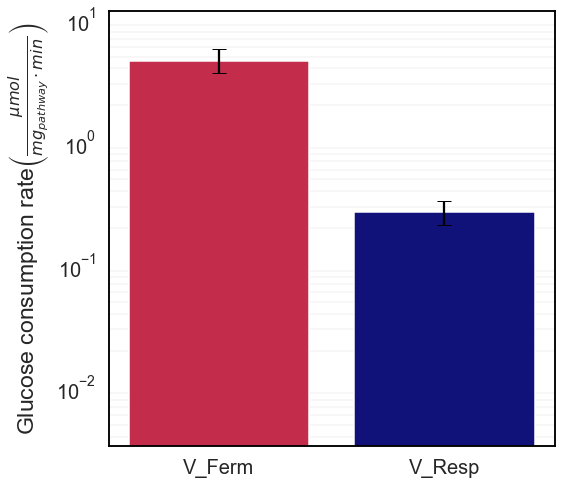

In [31]:
#Extended Data Fig. 4h
#Glucose consumption specific activities for S. cerevisiae 
fig = activityPlot(yeast_core, 'glucose')
fig.savefig('./Figures/edf4h_yeast_glucose_specific_activity.svg',format='svg', dpi=1200)

9.200348730640986
4.315355483480366


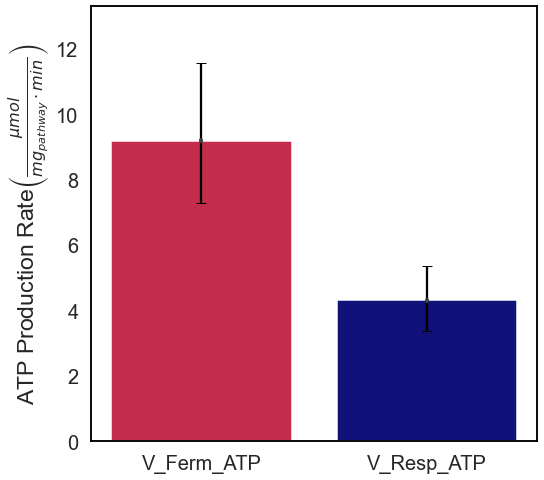

In [32]:
#Fig. 2b
#ATP production specific activities for S. cerevisiae 

fig = activityPlot(yeast_core, 'ATP')
fig.savefig('./Figures/fig2b_scerevisiae_atp_specific_activity_core.svg',format='svg', dpi=1200)

9.218774053414936
3.4405669493729447


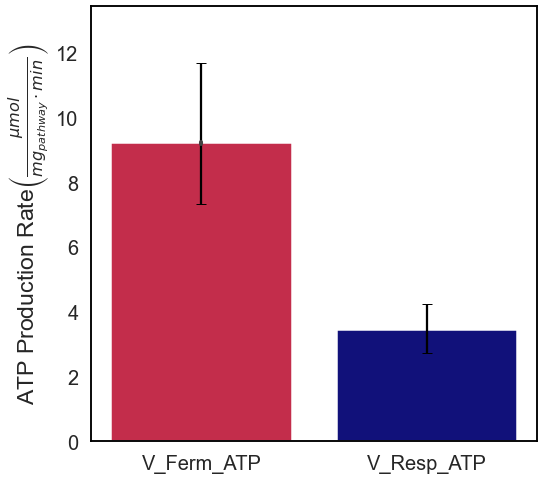

In [33]:
#Extended Data Fig. 6c
#ATP production specific activities for S. cerevisiae with the correlated mitochondrial proteome included

fig = activityPlot(yeast_partial_mito, 'ATP')
fig.savefig('./Figures/edf6c_scerevisiae_atp_specific_activity_partial_mito.svg',format='svg', dpi=1200)

9.210987586875362
2.395432898338362


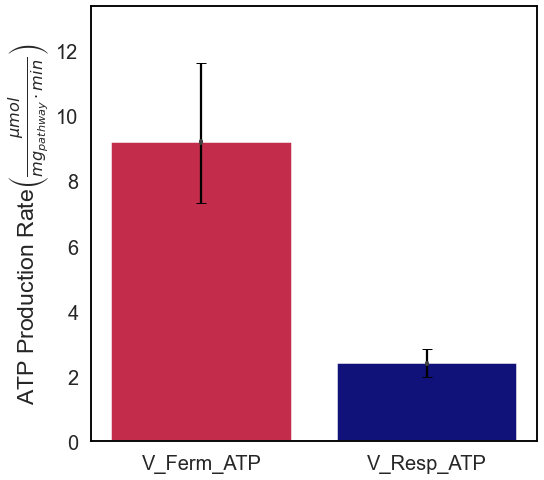

In [34]:
#Extended Data Fig. 6e
#ATP production specific activities for S. cerevisiae with the full mitochondrial proteome included

fig = activityPlot(yeast_full_mito, 'ATP')
fig.savefig('./Figures/edf6e_scerevisiae_atp_specific_activity_full_mito.svg',format='svg', dpi=1200)

In [35]:
#Specific acitivity estimate inputs for mammalian cells

#parameter estimates for proteome occupany
resp_proteomics_core = pd.read_csv('./Data/2024_02_26_mammalian_specific_actvity_resp_core.csv')
resp_proteomics_partial_mito = pd.read_csv('./Data/2024_02_26_mammalian_specific_actvity_resp_partial_mito.csv')
resp_proteomics_full_mito = pd.read_csv('./Data/2024_02_26_mammalian_specific_actvity_resp_full_mito.csv')
ferm_proteomics = pd.read_csv('./Data/2024_02_26_mammalian_specific_actvity_ferm.csv')

#rates
rates = pd.read_csv('./Data/mammalian_cellular_rates.csv')

In [36]:
#Calculating specific activities
mammalian_core = warburgRates(rates, ferm_proteomics, resp_proteomics_core, ferm_proteomics, 2, 24)

mammalian_partial_mito = warburgRates(rates, ferm_proteomics, resp_proteomics_partial_mito, ferm_proteomics, 2, 24)

mammalian_full_mito = warburgRates(rates, ferm_proteomics, resp_proteomics_full_mito, ferm_proteomics, 2, 24)


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

0.8153459877880278
0.021579336238520066


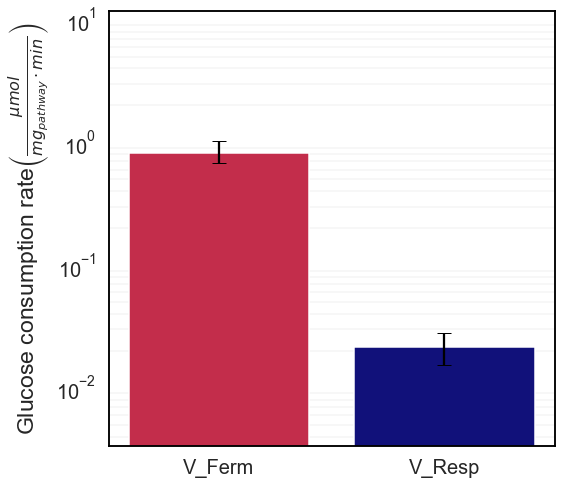

In [37]:
#Extended Data Fig. 4i
#Glucose consumption specific activities for mammalian cells
fig = activityPlot(mammalian_core, 'glucose')
fig.savefig('./Figures/edf4i_mammalian_glucose_specific_activity.svg',format='svg', dpi=1200)

1.6306919755760556
0.5179040697244812


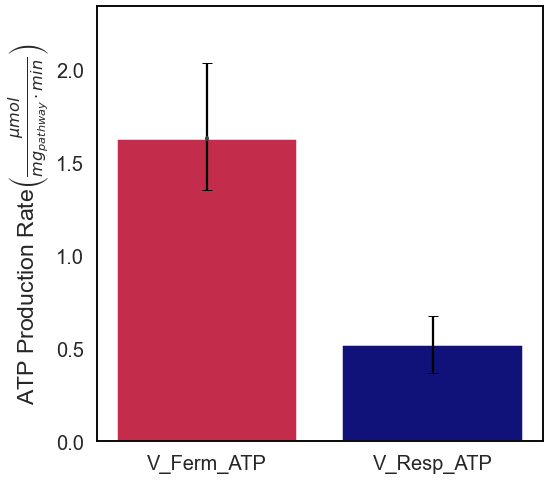

In [38]:
#Fig. 2c
#ATP production specific activities for mammalian cells 
fig = activityPlot(mammalian_core, 'ATP')
fig.savefig('./Figures/fig2c_mammalian_atp_specific_activity_core.svg',format='svg', dpi=1200)

1.6318622605857913
0.27308331519277274


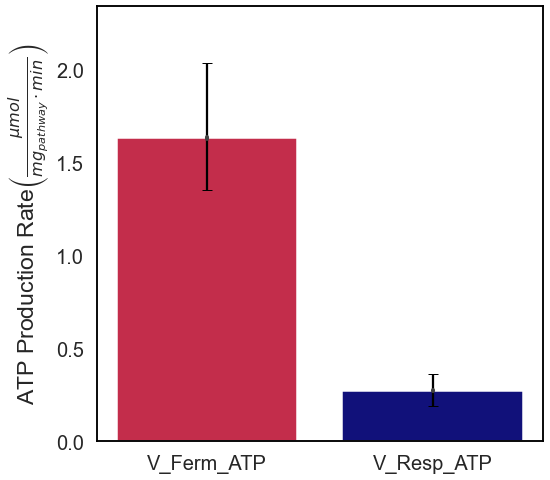

In [39]:
#Fig. 6f
#ATP production specific activities for mammalian cells 
fig = activityPlot(mammalian_partial_mito, 'ATP')
fig.savefig('./Figures/edf6f_mammalian_atp_specific_activity_partial_mito.svg',format='svg', dpi=1200)

1.6326200205489816
0.18797245456242787


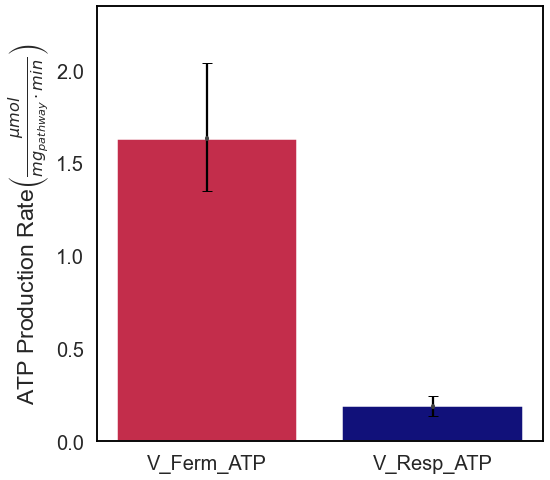

In [40]:
#ATP production specific activities for mammalian cells Fig. 2f
fig = activityPlot(mammalian_full_mito, 'ATP')
fig.savefig('./Figures/extended_data__mammalian_atp_specific_activity_full_mito.svg',format='svg', dpi=1200)

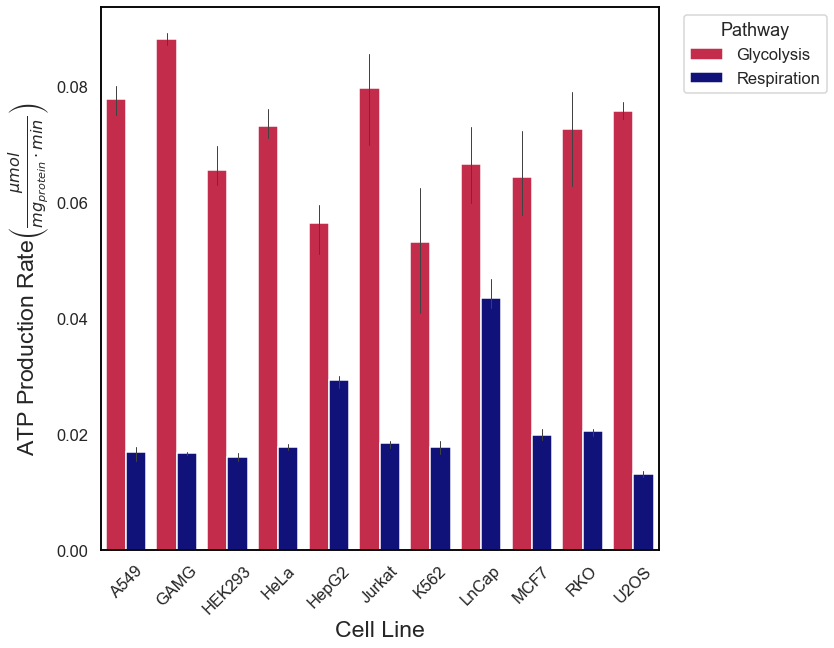

In [41]:
#Extended Data Fig 5
#Cell line specific ATP production rates
ferm_proteomics['umol ATP mgprotein-1 min-1'] = ferm_proteomics['value'] * mammalian_core['V_Ferm_ATP'].mean()
resp_proteomics_core['umol ATP mgprotein-1 min-1'] = resp_proteomics_core['value'] * mammalian_core['V_Resp_ATP'].mean()
resp_proteomics = resp_proteomics_core.copy()

#Remove geiger_2012 from variable description
ferm_proteomics['group'] = ferm_proteomics['variable'].str.extract(r'geiger_2012_([^_]+)')
resp_proteomics['group'] = resp_proteomics['variable'].str.extract(r'geiger_2012_([^_]+)')

#Add pathway for hue
ferm_proteomics['Pathway'] = 'Glycolysis'
resp_proteomics['Pathway'] = 'Respiration'

#Combine the dfs
combined_proteomics = ferm_proteomics.append(resp_proteomics, ignore_index=True)

#plot
plt.figure(figsize=(10,10))
fig = sns.barplot(x='group', y='umol ATP mgprotein-1 min-1', data=combined_proteomics, hue = 'Pathway', errwidth=1)
plt.xlabel('Cell Line', fontsize=23)
plt.ylabel("ATP Production Rate" r'$ \left(\frac{\mu mol}{mg_{protein} \cdot min^{}}\right)$', fontsize=23)
plt.xticks(rotation=45)  # Rotate labels if they are long or overlapping
plt.legend(title='Pathway', bbox_to_anchor=(1.03, 1), loc='upper left')

plt.savefig('./Figures/edf5_atp_production_rate.svg',format='svg', dpi=1200)